In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('NYC_Restaurants.csv',dtype=str)

**Q1. Create unique name for each restaurant**

In [2]:
### Concatenate the values in 5 columns for each row using join() within df.apply()

df['RESTAURANT'] = df[['DBA','BUILDING','STREET','ZIPCODE','BORO']].apply(lambda row: ' '.join(row),axis=1)
df['RESTAURANT'][:10,]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

**Q2. How many restaurants are included in the data?**

In [3]:
### Use unique() to output array of unique values in RESTAURANT column, find its length

len(pd.unique(df['RESTAURANT']))

10114

**Q3. How many chains are there?**

In [4]:
### Keep unique entries in df with DBA and RESTAURANT columns
### Group by DBA taking count of 'restaurants' into the RESTAURANT column
### Now apply mask to this newly created dataframe where the count of restaurants in a row (i.e. against a DBA) > 1
### Length of the output dataframe is the number of chains

df_chains = df[['DBA','RESTAURANT']].drop_duplicates().groupby('DBA').size().reset_index(name='RESTAURANT')
len(df_chains[df_chains.RESTAURANT>1])

368

**Q4. Plot a bar graph of top 20 most popular chains**

<AxesSubplot:xlabel='DBA'>

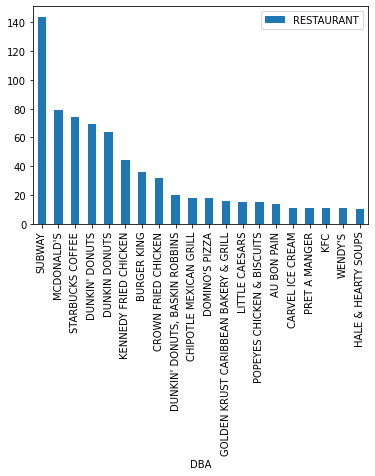

In [5]:
### Sort the dataframe obtained in previous question in descending order by RESTAURANT, after filtering it to keep only chains
### Keep top 20 rows and plot bar graph

df_chains[df_chains.RESTAURANT>1].sort_values(by='RESTAURANT',ascending=False).iloc[:20,].plot.bar(x='DBA',y='RESTAURANT')

**Q5. What fraction of all restaurants are chain restaurants**

In [6]:
### Using the dataframe obtained previously for chains, sum the column 'RESTAURANT' for DBA that are chains
### Divide this number by total number of restaurants as calculated in Q2

df_chains[df_chains['RESTAURANT']>1]['RESTAURANT'].sum() / len(pd.unique(df['RESTAURANT']))

0.16472216729286138

**Q6. Plot the number of non-chain restaurants in each boro**

<AxesSubplot:xlabel='BORO'>

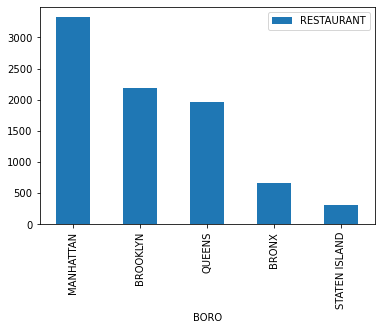

In [7]:
### Define column 'TYPE' in the chains dataframe to identify DBAs which are Independent and those that are part of chains
### Merge chains dataframe to main dataframe (Left Join) on DBA column
### Filter dataframe for rows where restaurants are non-chain and BORO is not missing, drop duplicates
### Group by BORO taking count of restaurants in the RESTAURANT column
### Sort in descending order of restaurant count and plot bar graph

df_chains['TYPE'] = df_chains['RESTAURANT'].apply(lambda row:'Independent' if row == 1 else 'Chain')
df = df.merge(df_chains[['DBA','TYPE']],on='DBA',how='left')
df[(df['TYPE']=='Independent') & (df['BORO']!='Missing')][['RESTAURANT','BORO']].drop_duplicates().\
                                        groupby('BORO').size().reset_index(name='RESTAURANT').\
                                        sort_values(by='RESTAURANT',ascending=False).\
                                        plot.bar(x='BORO',y='RESTAURANT')

**Q7. Plot the fraction of non-chain restaurants in each boro**

<AxesSubplot:xlabel='BORO'>

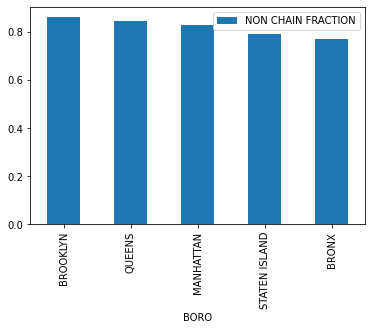

In [8]:
### Create a new dataframe with BOROs and number of chain and non-chain restaurants in each BORO
### Add a column for fraction of non-chain restaurants out of total restaurants in each BORO
### Plot a bar graph

df_boro = df[(df['TYPE']=='Independent') & (df['BORO']!='Missing')][['RESTAURANT','BORO']].drop_duplicates().\
                                                groupby('BORO').size().reset_index(name='INDEPENDENT RES')
df_boro['CHAIN RES'] = df[(df['TYPE']=='Chain') & (df['BORO']!='Missing')][['RESTAURANT','BORO']].drop_duplicates().\
                                                groupby('BORO').size().reset_index(name='CHAIN RES')['CHAIN RES']
df_boro['NON CHAIN FRACTION'] = df_boro['INDEPENDENT RES'] / (df_boro['INDEPENDENT RES'] + df_boro['CHAIN RES'])

df_boro.sort_values(by='NON CHAIN FRACTION',ascending=False).plot.bar(x='BORO',y='NON CHAIN FRACTION')

### Comments:
### No, the borough with highest independent restaurants (Manhattan) is not the same as
### the borough with highest proportion of independent restaurants (Brooklyn)

**Q8. Plot the popularity of cuisines**

<AxesSubplot:xlabel='CUISINE DESCRIPTION'>

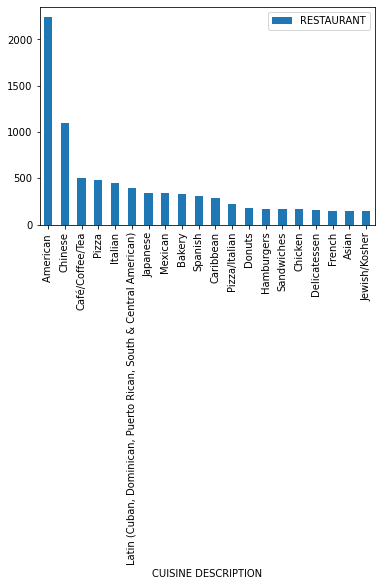

In [9]:
### Select cuisine and restaurant from original dataframe and drop duplicates
### Group by cuisine taking count of restaurants in RESTAURANT column
### Sort in descending order by count of restaurants, keep top 20 rows and plot bar graph

df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates().groupby('CUISINE DESCRIPTION').\
                                        size().reset_index(name='RESTAURANT').sort_values(by='RESTAURANT',ascending=False).\
                                        iloc[:20,].plot.bar(x='CUISINE DESCRIPTION',y='RESTAURANT')

**Q9. Plot cuisines among restaurants which never got cited for violations**

<AxesSubplot:xlabel='CUISINE DESCRIPTION'>

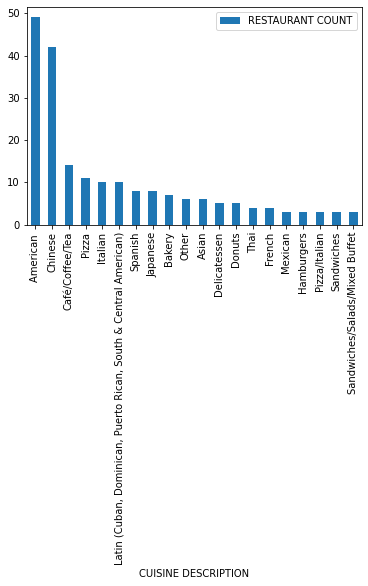

In [10]:
### Create boolean variable in original dataframe equal to TRUE where violation code exists, else FALSE
### Select restaurant and boolean variable from original dataframe, drop duplicates
### Group by restaurant taking count of boolean variable in violation count column
### Store the result in a new dataframe (df_res_viol_1) keeping only those records with violation count = 2
### Filter records with no violation count in original dataframe and select restaurant and boolean variable, drop duplicates
### Group by restaurant taking count of boolean variable in violation count column
### Store the result in a new dataframe (df_res_viol_2)
### Merge df_res_viol_2 with df_res_viol_1 (Left Join) on restaurant and filter violation count column from right to keep only NaN values
### Store the output that is list of restaurants with no cited violations back to the df_res_viol_2 dataframe
### Merge this dataframe back with original dataframe (selecting only restaurant and cuisine)
### Select cuisine and restaurant from df_res_viol_2, group by cuisine taking count of restaurant in restaurant count column
### Sort in descending order by count of restaurants, keep top 20 rows and plot bar graph

df['VIOLATION BOOL'] = df['VIOLATION CODE'].apply(lambda row: False if pd.isnull(row) else True)        
df_res_viol_1 = df[['RESTAURANT','VIOLATION BOOL']].drop_duplicates().groupby('RESTAURANT').\
                                                    size().reset_index(name='VIOLATION COUNT')
df_res_viol_1 = df_res_viol_1[df_res_viol_1['VIOLATION COUNT']==2]
df_res_viol_2 = df[df['VIOLATION BOOL']==False][['RESTAURANT','VIOLATION BOOL']].drop_duplicates().groupby('RESTAURANT').\
                                                    size().reset_index(name='VIOLATION COUNT')

df_res_viol_2 = df_res_viol_2.merge(df_res_viol_1,how='left',on='RESTAURANT')
df_res_viol_2 = df_res_viol_2[df_res_viol_2['VIOLATION COUNT_y'].isna()]

df_res_viol_2 = df_res_viol_2.merge(df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates(),how='left',on='RESTAURANT')
df_res_viol_2[['CUISINE DESCRIPTION','RESTAURANT']].groupby('CUISINE DESCRIPTION').size().reset_index(name='RESTAURANT COUNT').\
                                                    sort_values(by='RESTAURANT COUNT',ascending=False).iloc[:20,].\
                                                    plot.bar(x='CUISINE DESCRIPTION', y='RESTAURANT COUNT')

**Q10. What cuisines tend to be the 'cleanest'?**

<AxesSubplot:xlabel='CUISINE DESCRIPTION'>

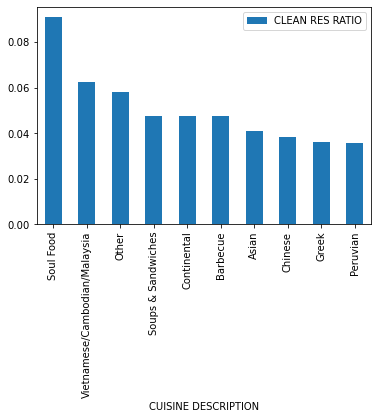

In [11]:
### (a)Select cuisine and restaurant column from original dataframe, remove duplicates
### Group by cuisine taking count of restaurants in all restaurants column
### Store result in new dataframe
### Filter new dataframe to keep only those rows where a cuisine has at least 20 restaurants serving it
### (b)Select cuisine, restaurant from df_res_viol_2 (from Q9), group by cuisine taking count of restaurants in clean restaurants column
### Merge (a) with (b) (Left Join) on cuisine column
### Compute clean restaurant ratio using ALL RESTAURANTS and CLEAN RESTAURANTS
### Sort dataframe in descending order, keep top 10 rows and plot bar graph for the above computed ratio

df_cuisine = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates().groupby('CUISINE DESCRIPTION').size().\
                                        reset_index(name='ALL RESTAURANTS')
df_cuisine = df_cuisine[df_cuisine['ALL RESTAURANTS']>=20]

df_cuisine = df_cuisine.merge(df_res_viol_2[['CUISINE DESCRIPTION','RESTAURANT']].groupby('CUISINE DESCRIPTION').\
                     size().reset_index(name='CLEAN RESTAURANTS'),how='left',on='CUISINE DESCRIPTION')

df_cuisine['CLEAN RES RATIO'] = df_cuisine['CLEAN RESTAURANTS']/df_cuisine['ALL RESTAURANTS']
df_cuisine.sort_values(by='CLEAN RES RATIO',ascending=False).iloc[:10,].\
                    plot.bar(x='CUISINE DESCRIPTION',y='CLEAN RES RATIO')


**Q11. What are the most common violations in each borough?**


In [12]:
### Filter out boroughs with missing data, select only the BORO, VIOLATION DESCRIPTION and the Unnamed:0 index columns
### Group by BORO and VIOLATION DESCRIPTION, taking the count of rows in the COUNT column
### Sort in descending order of COUNT within each BORO and store in new dataframe
### Keep the first row of new dataframe for each unique value of BORO to get most common violation

df_violation = df[df['BORO']!='Missing'][['BORO','VIOLATION DESCRIPTION','Unnamed: 0']].dropna().\
                                        groupby(['BORO','VIOLATION DESCRIPTION']).\
                                        size().reset_index(name='COUNT').\
                                        sort_values(by=['BORO','COUNT'],ascending=[False,False])

df_violation.drop_duplicates(subset='BORO')

,BORO,VIOLATION DESCRIPTION,COUNT
324,STATEN ISLAND,Non-food contact surface improperly constructe...,230
264,QUEENS,Non-food contact surface improperly constructe...,1416
185,MANHATTAN,Non-food contact surface improperly constructe...,2417
110,BROOKLYN,Non-food contact surface improperly constructe...,1485
40,BRONX,Non-food contact surface improperly constructe...,500


**Q12. What are the most common violations per borough after normalizing for the relative abundance of each violation?**

In [13]:
### Create a Violation Master dataframe with Violation Description and number of complaints against it (Overall Frequency)
### Merge violation dataframe from last question with this new Master dataframe (Left Join) on VIOLATION DESCRIPTION column
### Now, divide COUNT_x (no. of complaints of a violation desc in a BORO) by COUNT_y (total no. of complaints of a violation desc)
### Add this normalized value as a column in dataframe
### Sort in descending order of normalized violation frequency withing each BORO
### Keep the first row of sorted dataframe for each unique value of BORO to get most common violation by normalized violation frequency


df_violation_master = df_violation[['VIOLATION DESCRIPTION','COUNT']].groupby('VIOLATION DESCRIPTION').\
                                                                        agg('sum').reset_index()
df_violation = df_violation.merge(df_violation_master,on='VIOLATION DESCRIPTION',how='left')
df_violation['NORM VIOL'] = df_violation['COUNT_x']/df_violation['COUNT_y']
df_violation.sort_values(by=['BORO','NORM VIOL'],ascending=[False,False]).drop_duplicates(subset='BORO')[['BORO','VIOLATION DESCRIPTION','NORM VIOL']]

,BORO,VIOLATION DESCRIPTION,NORM VIOL
46,STATEN ISLAND,"Eggs found dirty/cracked; liquid, frozen or po...",0.090909
120,QUEENS,Caloric content range (minimum to maximum) not...,1.000000
198,MANHATTAN,Out-of package sale of tobacco products observed.,1.000000
263,BROOKLYN,Precooked potentially hazardous food from comm...,0.714286
342,BRONX,Unprotected food re-served.,0.500000


**Q13. How many phone area codes correspond to a single zipcode?**

In [14]:
### Add a new column AREA CODE to original dataframe by taking a substring of PHONE
### Select AREA CODE and ZIPCODE from original dataframe, drop duplicates
### Group by AREA CODE taking count of zipcodes in COUNT OF ZIPCODES column
### Store result in a new dataframe
### Apply filter to new dataframe to keep only area codes with 1 zipcode count and take length of it

df['AREA CODE'] = df['PHONE'].str[:3]
df_areacodes = df[['AREA CODE','ZIPCODE']].drop_duplicates().groupby('AREA CODE').size().reset_index(name='COUNT OF ZIPCODES')
len(df_areacodes[df_areacodes['COUNT OF ZIPCODES']==1])

34

**Q14. Find common misspellings of street names**

In [15]:
### Create Street Type by taking substring from STREET after last space
### Create Street Base by taking substring from STREET before last space, or entire STREET value if no spaces
### Create Street Base and Zip by concatenating Street Base and Zipcode
### Select only Street Type, Street Base, Street Base & ZIP frpm original dataframe, filtering out rows with no Street Base, drop duplicates
### Store output in a new dataframe
### Merge this new dataframe with itself on Street Base & ZIP
### Create crosstab on merged dataframe using Street Types on either side of merge
### Initiate an empty dataframe to store our results for display
### Create a list of common misspelled street types given in the question
### Iterate over index and values of this list
### Store misspelled street type from list as 'Misspelled Street Type' in initiated dataframe
### Store id of max column value from crosstab for given misspelled street type as 'Correct Street Type' in initiated dataframe
### Print dataframe

df['STREET TYPE'] = np.where(len(df['STREET'].apply(lambda row: row.split(" ")))>1,\
                             df['STREET'].apply(lambda row: row.split(" ")[-1]),df['STREET'])
df['STREET BASE'] = np.where(len(df['STREET'].apply(lambda row: row.split(" ")))>1,\
                            (df['STREET'].apply(lambda row: row.split(" ")[:-1])),\
                             np.NaN)
df['STREET BASE'] = df['STREET BASE'].apply(lambda row: " ".join(row))

df['STREET BASE & ZIP'] = df['STREET BASE'].astype(str)+" "+df['ZIPCODE'].astype(str)
df_streets = df[df['STREET BASE'].notna()][['STREET TYPE','STREET BASE','STREET BASE & ZIP']].drop_duplicates()

df_streets_joined = df_streets.merge(df_streets, on = 'STREET BASE & ZIP')
df_streets_joined = df_streets_joined[df_streets_joined['STREET TYPE_x']!= df_streets_joined['STREET TYPE_y']]
street_crosstab = pd.crosstab(df_streets_joined['STREET TYPE_x'],df_streets_joined['STREET TYPE_y'])

misspelled_street_type = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD','BULEVARD']

df_misspelled_streets = pd.DataFrame()
for i,value in enumerate(misspelled_street_type):
    df_misspelled_streets = df_misspelled_streets.append({'Misspelled Street Type':misspelled_street_type[i], \
                                         'Correct Street Type':street_crosstab[value].idxmax()}, ignore_index=True)
df_misspelled_streets[['Misspelled Street Type','Correct Street Type']]

,Misspelled Street Type,Correct Street Type
0,AVE,AVENUE
1,ST,STREET
2,RD,ROAD
3,PL,PLACE
4,BOULEARD,BLVD
5,BULEVARD,BLVD
